In [1]:
from pathlib import Path
import random

import matplotlib.pyplot as plt
from minisom import MiniSom
import pandas as pd

from utils import normalize

In [2]:
pwd = Path.cwd()
project_dir = pwd.parent
csv_file = project_dir / "data" / "animals.csv"

In [3]:
df_animals_readin = pd.read_csv(csv_file, index_col="animal_name")
df_animals = normalize(df_animals_readin)

In [4]:
# Initialize and train
som = MiniSom(14, 14, 17, sigma=1., learning_rate=1, 
              neighborhood_function='gaussian', random_seed=10)

som.pca_weights_init(df_animals.values)
som.train_batch(df_animals.values, 1000, verbose=False)

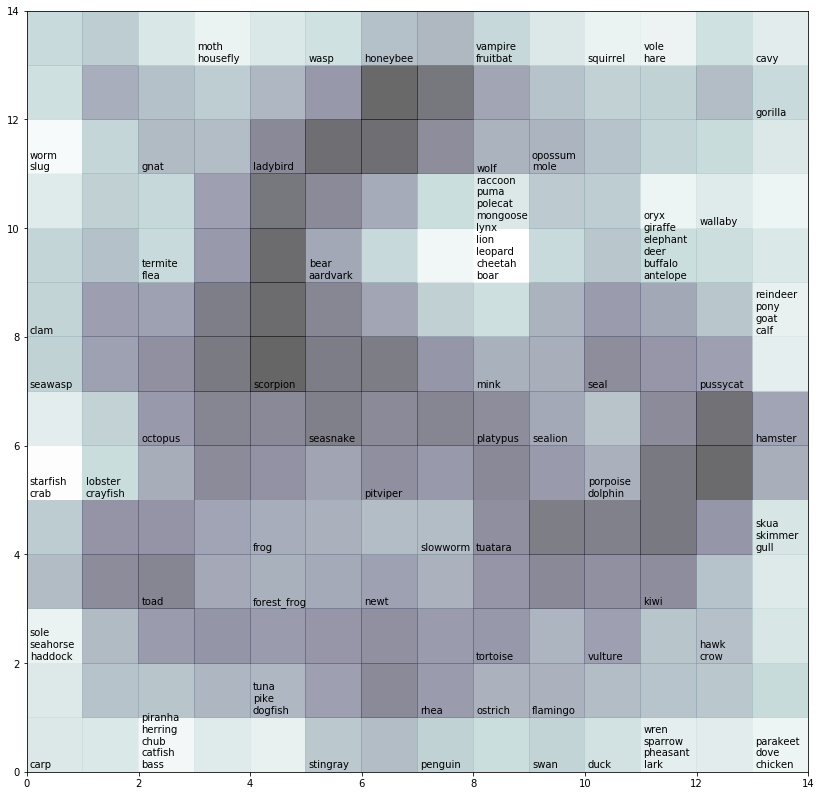

In [5]:
# Plot
plt.figure(figsize=(14, 14))
_var = {(i, j): 0 for i in range(14) for j in range(14)}
for name, properties in zip(df_animals.index, df_animals.values):
    w = som.winner(properties)
    _var[w] += 1
    plt.text(w[0]+0.05, w[1]+0.22*_var[w]-0.15, name)
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.6)